- Normalization: It means subtracting the mean of the variable to each observation.
- Standarisation: It means centering the variable at zero, and standarising the variance at 1. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('C:\\Users\\admin\PP_programs\DataRepo\\titanic\\train.csv', usecols = ['Pclass', 'Age', 'Fare', 'Survived'])
data.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [3]:
data.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [4]:
data.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data[['Pclass', 'Age', 'Fare']],
                                                    data.Survived, test_size=0.3,
                                                    random_state=12)
X_train.shape, X_test.shape

((623, 3), (268, 3))

In [6]:
X_train.Age.fillna(X_train.Age.median(), inplace=True)
X_test.Age.fillna(X_train.Age.median(), inplace=True)

In [7]:
X_train

,Pclass,Age,Fare
832,3,28.0,7.2292
391,3,21.0,7.7958
497,3,28.0,15.1000
398,2,23.0,10.5000
70,2,32.0,10.5000
...,...,...,...
241,3,28.0,15.5000
253,3,30.0,16.1000
390,1,36.0,120.0000
667,3,28.0,7.7750


In [8]:
scaler = StandardScaler() # create an object
X_train_scaled = scaler.fit_transform(X_train) # fit the scaler to the train set, and then transform it
X_test_scaled = scaler.transform(X_test) # transform the test set

In [9]:
print('means (Pclass, Age and Fare): ', X_train_scaled.mean(axis=0))
print('std (Pclass, Age and Fare): ', X_train_scaled.std(axis=0))

means (Pclass, Age and Fare):  [ 2.30954902e-16  4.56207214e-17 -6.84310821e-17]
std (Pclass, Age and Fare):  [1. 1. 1.]


In [10]:
print('Min values (Pclass, Age and Fare): ', X_train_scaled.min(axis=0))
print('Max values (Pclass, Age and Fare): ', X_train_scaled.max(axis=0))

Min values (Pclass, Age and Fare):  [-1.59540602 -2.24905928 -0.65962527]
Max values (Pclass, Age and Fare):  [0.83476012 4.05939407 9.83148003]


(array([ 27.,  11.,  11.,  22.,  60.,  67., 193.,  59.,  49.,  30.,  24.,
         21.,  18.,  11.,   9.,   3.,   2.,   4.,   1.,   1.]),
 array([-2.24905928, -1.93363661, -1.61821395, -1.30279128, -0.98736861,
        -0.67194594, -0.35652327, -0.04110061,  0.27432206,  0.58974473,
         0.9051674 ,  1.22059006,  1.53601273,  1.8514354 ,  2.16685807,
         2.48228074,  2.7977034 ,  3.11312607,  3.42854874,  3.74397141,
         4.05939407]),
 <a list of 20 Patch objects>)

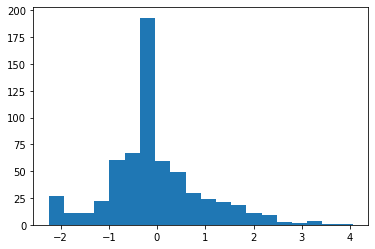

In [11]:
plt.hist(X_train_scaled[:,1], bins=20)

(array([395., 115.,  43.,  28.,  14.,  13.,   2.,   0.,   9.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([-0.65962527, -0.13507   ,  0.38948526,  0.91404053,  1.43859579,
         1.96315106,  2.48770632,  3.01226159,  3.53681685,  4.06137212,
         4.58592738,  5.11048265,  5.63503791,  6.15959318,  6.68414844,
         7.20870371,  7.73325897,  8.25781423,  8.7823695 ,  9.30692476,
         9.83148003]),
 <a list of 20 Patch objects>)

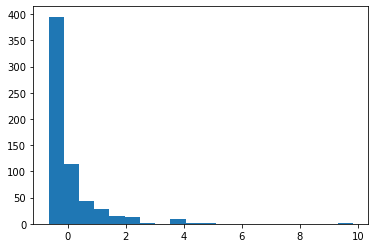

In [12]:
plt.hist(X_train_scaled[:,2], bins=20)

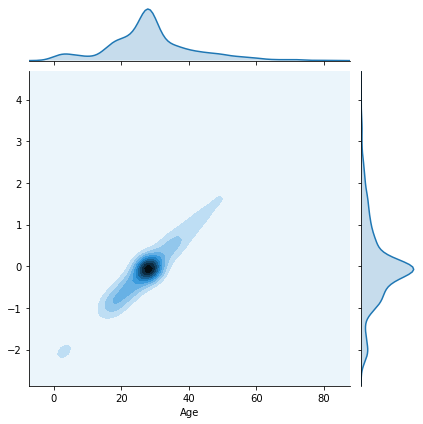

In [13]:
import seaborn as sns
sns.jointplot(X_train.Age, X_train_scaled[:,1], kind='kde')

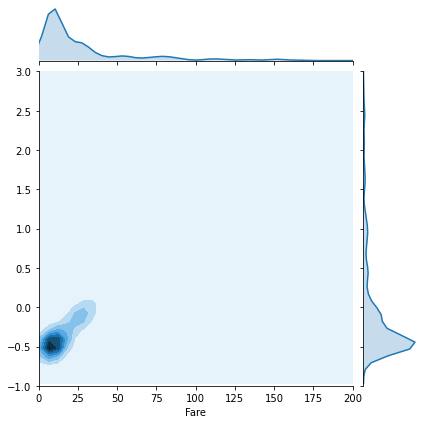

In [14]:
sns.jointplot(X_train.Fare, X_train_scaled[:,2], kind='kde', xlim=(0,200), ylim=(-1,3))

Observation: The values are concentrated on the lower left side of the plot, because Fare is highly skewed

#### Other Mathods

#### Scaling to minimum and maximum values

Minimum and maximum scaling squeezes the values between 0 and 1. It subtracts the minimum value from all the observations, and then divides it by the range:

X_scaled = (X - X.min / (X.max - X.min)

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # create an instance
X_train_scaled = scaler.fit_transform(X_train) #  fit  the scaler to the train set and then transform it
X_test_scaled = scaler.transform(X_test) # transform (scale) the test set

In [18]:
print('means (Pclass, Age and Fare): ', X_train_scaled.mean(axis=0))
print('std (Pclass, Age and Fare): ', X_train_scaled.std(axis=0))
print('Min values (Pclass, Age and Fare): ', X_train_scaled.min(axis=0))
print('Max values (Pclass, Age and Fare): ', X_train_scaled.max(axis=0))

means (Pclass, Age and Fare):  [0.6565008  0.35651516 0.06287472]
std (Pclass, Age and Fare):  [0.4114945  0.15851746 0.09531884]
Min values (Pclass, Age and Fare):  [0. 0. 0.]
Max values (Pclass, Age and Fare):  [1. 1. 1.]


(array([ 27.,  11.,  11.,  22.,  60.,  67., 193.,  59.,  49.,  30.,  24.,
         21.,  18.,  11.,   9.,   3.,   2.,   4.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

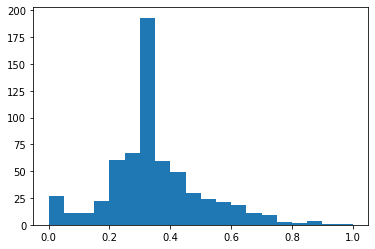

In [19]:
plt.hist(X_train_scaled[:,1], bins=20)

(array([395., 115.,  43.,  28.,  14.,  13.,   2.,   0.,   9.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

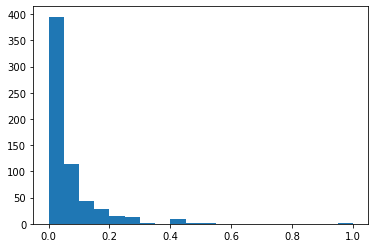

In [20]:
plt.hist(X_train_scaled[:,2], bins=20)

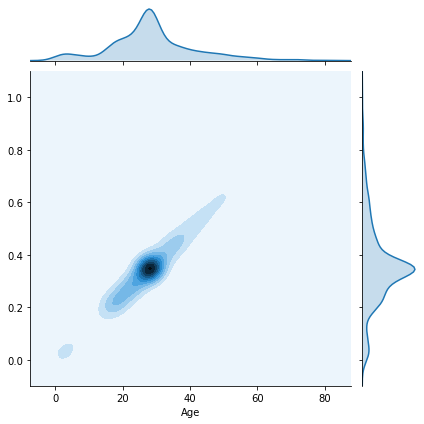

In [21]:
sns.jointplot(X_train.Age, X_train_scaled[:,1], kind='kde')

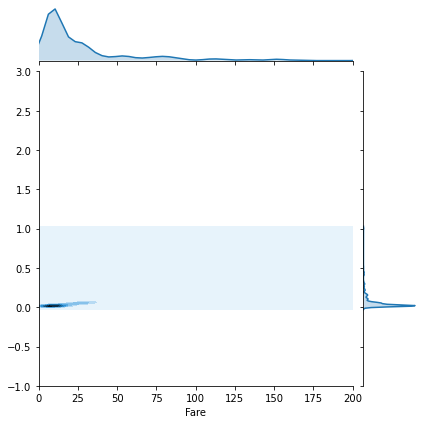

In [22]:
sns.jointplot(X_train.Fare, X_train_scaled[:,2], kind='kde', xlim=(0,200), ylim=(-1,3))

Observation:
    MinMaxScaler is very sensitive to the presence of outliers. It compressed all inliers in the narrow range [0, 0.01] limiting the spread of the variable, and therefore, very likely it would affect the predictive power of this feature.

#### Scaling to median and quantiles

Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

In [24]:
from sklearn.preprocessing import RobustScaler

In [25]:
X_train.Age.fillna(X_train.Age.median(), inplace=True)
X_test.Age.fillna(X_train.Age.median(), inplace=True)

In [26]:
scaler = RobustScaler() # call the object
X_train_scaled = scaler.fit_transform(X_train) # fit the scaler to the train set, and then scale it
X_test_scaled = scaler.transform(X_test) # scale the test set

In [27]:
print('means (Pclass, Age and Fare): ', X_train_scaled.mean(axis=0))
print('std (Pclass, Age and Fare): ', X_train_scaled.std(axis=0))

means (Pclass, Age and Fare):  [-0.68699839  0.06595639  0.82664147]
std (Pclass, Age and Fare):  [0.822989   1.05123495 2.1011641 ]


(array([ 27.,  11.,  11.,  22.,  60.,  67., 193.,  59.,  49.,  30.,  24.,
         21.,  18.,  11.,   9.,   3.,   2.,   4.,   1.,   1.]),
 array([-2.29833333, -1.96675   , -1.63516667, -1.30358333, -0.972     ,
        -0.64041667, -0.30883333,  0.02275   ,  0.35433333,  0.68591667,
         1.0175    ,  1.34908333,  1.68066667,  2.01225   ,  2.34383333,
         2.67541667,  3.007     ,  3.33858333,  3.67016667,  4.00175   ,
         4.33333333]),
 <a list of 20 Patch objects>)

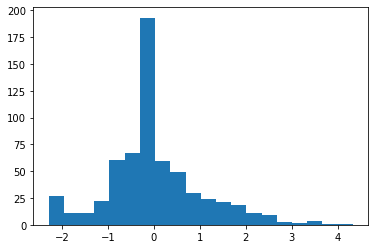

In [28]:
plt.hist(X_train_scaled[:,1], bins=20)

(array([395., 115.,  43.,  28.,  14.,  13.,   2.,   0.,   9.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([-0.55933946,  0.54283723,  1.64501392,  2.74719061,  3.8493673 ,
         4.95154399,  6.05372068,  7.15589737,  8.25807407,  9.36025076,
        10.46242745, 11.56460414, 12.66678083, 13.76895752, 14.87113421,
        15.9733109 , 17.07548759, 18.17766428, 19.27984098, 20.38201767,
        21.48419436]),
 <a list of 20 Patch objects>)

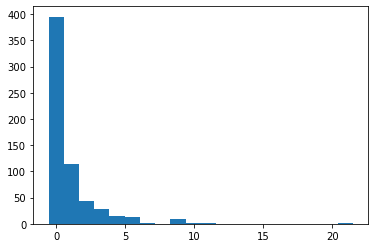

In [29]:
plt.hist(X_train_scaled[:,2], bins=20)

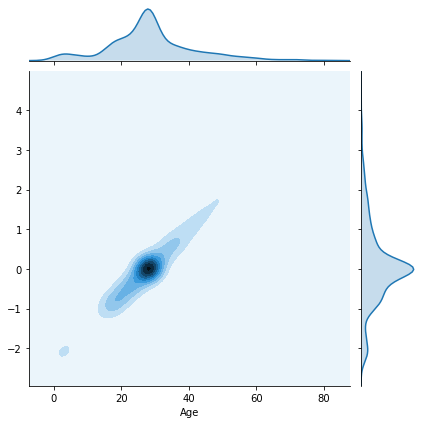

In [30]:
sns.jointplot(X_train.Age, X_train_scaled[:,1], kind='kde')

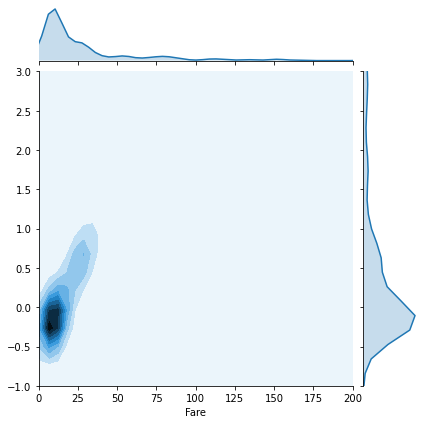

In [31]:
sns.jointplot(X_train.Fare, X_train_scaled[:,2], kind='kde', xlim=(0,200), ylim=(-1,3))

Observation:
    When the distribution of the variable is skewed, perhaps it is better to scale using the mean and quantiles method, which is more robust to the presence of outliers.